# 4. [Linear Algebra 線性代數](https://github.com/joelgrus/data-science-from-scratch/blob/master/code/linear_algebra.py)
https://github.com/joelgrus/data-science-from-scratch

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
# -*- coding: iso-8859-15 -*-

# from __future__ import division # want 3 / 2 == 1.5
import re, math, random # regexes, math functions, random numbers
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial, reduce

In [5]:
# 
# functions for working with vectors
#

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

a = [1, 2]
b = [3, 4]
vector_add(a, b)

[4, 6]

In [6]:
def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

a = [1, 2]
b = [3, 4]
vector_subtract(a, b)

[-2, -2]

In [14]:
def vector_sum(vectors):
    return reduce(vector_add, vectors)

a = [1, 2]
b = [3, 4]
vector_sum((a, b))

[4, 6]

In [16]:
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

a = [1, 2] 
scalar_multiply(2, a)

[2, 4]

In [18]:
# this isn't right if you don't from __future__ import division
def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

a = [1, 2]
b = [3, 5]
vector_mean((a, b))

[2.0, 3.5]

In [20]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

a = [1, 2]
b = [3, 4]
dot(a, b)

11

In [21]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

a = [1, 2] 
sum_of_squares(a)

5

In [22]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

a = [1, 2] 
magnitude(a)

2.23606797749979

In [29]:
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

a = [1, 2]
b = [3, 4]
vector_subtract(a, b), squared_distance(a, b)

([-2, -2], 8)

In [30]:
def distance(v, w):
    return math.sqrt(squared_distance(v, w))

distance(a, b)

2.8284271247461903

In [31]:
#
# functions for working with matrices
#

def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

#          user 0  1  2  3  4  5  6  7  8  9
#
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

shape(friendships)

(10, 10)

In [32]:
def get_row(A, i):
    return A[i]

get_row(friendships, 2)

[1, 1, 0, 1, 0, 0, 0, 0, 0, 0]

In [33]:
def get_column(A, j):
    return [A_i[j] for A_i in A]

get_column(friendships, 2)

[1, 1, 0, 1, 0, 0, 0, 0, 0, 0]

In [34]:
def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix 
    whose (i,j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)]  

def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0


identity_matrix = make_matrix(5, 5, is_diagonal)
identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [35]:
#####
# DELETE DOWN
#

def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")
        
    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]
        
    return make_matrix(num_rows, num_cols, entry_fn)

matrix_add(identity_matrix, identity_matrix)

[[2, 0, 0, 0, 0],
 [0, 2, 0, 0, 0],
 [0, 0, 2, 0, 0],
 [0, 0, 0, 2, 0],
 [0, 0, 0, 0, 2]]

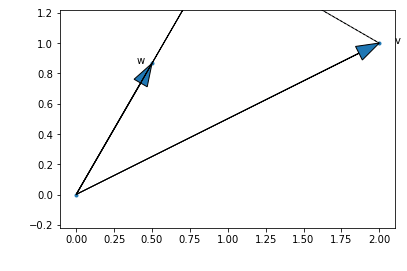

In [38]:
def make_graph_dot_product_as_vector_projection(plt):

    v = [2, 1]
    w = [math.sqrt(.25), math.sqrt(.75)]
    c = dot(v, w)
    vonw = scalar_multiply(c, w)
    o = [0,0]

    plt.arrow(0, 0, v[0], v[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("v", v, xytext=[v[0] + 0.1, v[1]])
    plt.arrow(0 ,0, w[0], w[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])
    plt.arrow(0, 0, vonw[0], vonw[1], length_includes_head=True)
    plt.annotate(u"(v•w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.1])
    plt.arrow(v[0], v[1], vonw[0] - v[0], vonw[1] - v[1], 
              linestyle='dotted', length_includes_head=True)
    plt.scatter(*zip(v,w,o),marker='.')
    plt.axis('equal')
    plt.show()
    
make_graph_dot_product_as_vector_projection(plt);